In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

<IPython.core.display.Javascript object>


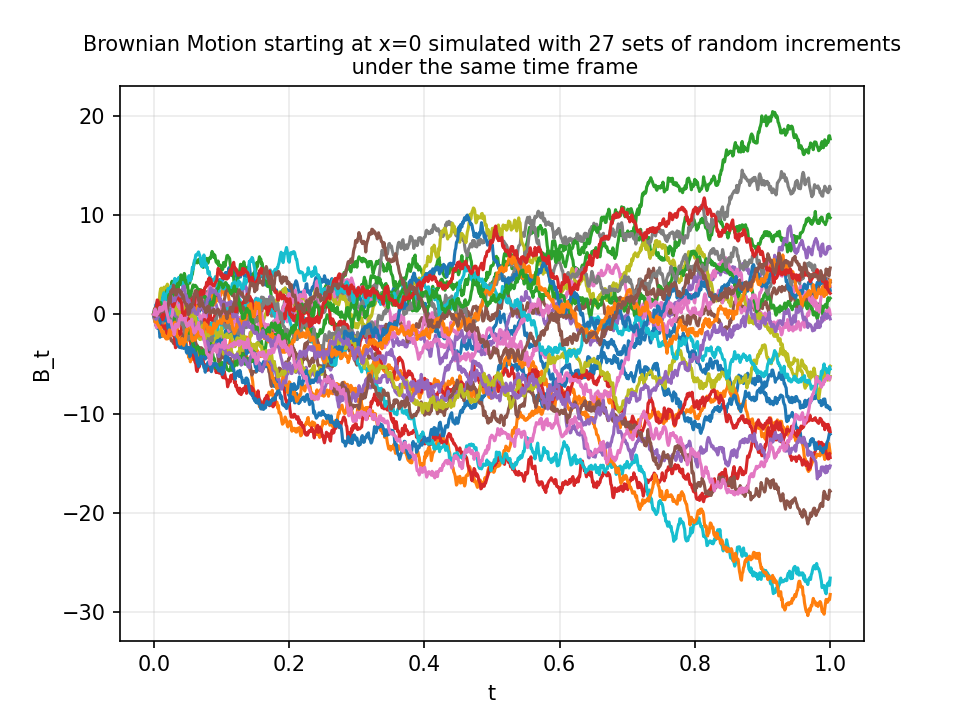

In [41]:
## Brownian Motion ##

n = 1000
t = np.linspace(0,1,n)  ## time-frame
d = 27  ## no. of sets for random increments
dt = 0.1 ## time-step
n = np.size(t)
np.random.seed(3) ##seeding
dB_t = np.random.normal(0, np.sqrt(dt), size = (n-1,d))  ## Brownian Motion has gaussian increments

B0 = np.zeros(shape=(1,d))
B_t = np.concatenate((B0,np.cumsum(dB_t,axis=0)),axis=0) ## Cumulative sum of the increments to give the particle positions

plt.plot(t,B_t)
plt.xlabel('t')
plt.ylabel('B_t')
plt.title('Brownian Motion starting at x=0 simulated with 27 sets of random increments\n under the same time frame', size=10)
plt.grid(linewidth=0.2)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


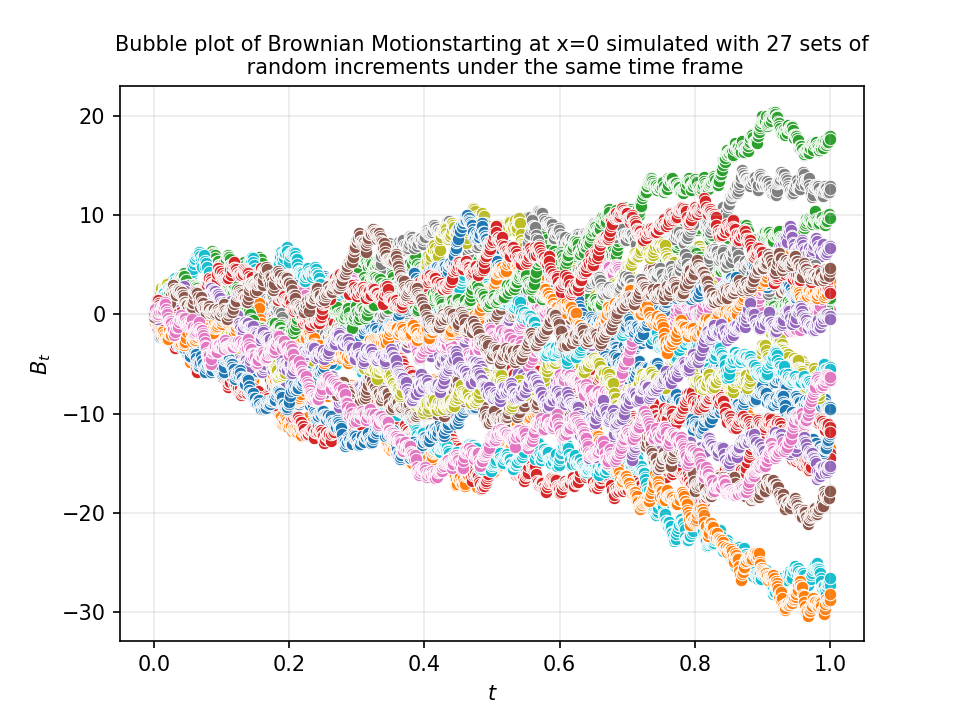

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-

In [42]:

for i in range(d):
    sns.scatterplot(t,B_t[:,i])  ## Bubble-Plot
plt.xlabel('$t$')
plt.ylabel('$B_t$')
plt.title('Bubble plot of Brownian Motionstarting at x=0 simulated with 27 sets of\n random increments under the same time frame', size=10)
plt.grid(linewidth=0.2)
plt.show()

<IPython.core.display.Javascript object>


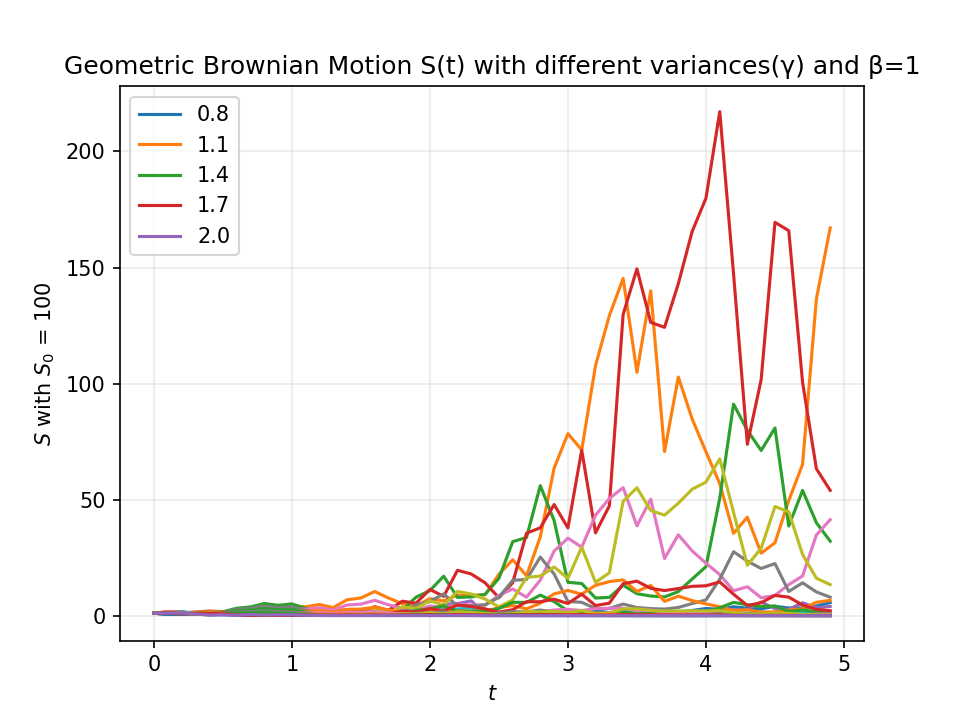

In [43]:
## Geometric Brownian Motion ##

beta = 1  #beta
gamma = np.arange(0.8,2.1,0.3) #for different variances
x0 = 100
t = np.arange(0,5,0.1)
dt = 0.1
n = np.size(t)
np.random.seed(59) ## seeding

dW_t = np.random.normal(0, np.sqrt(dt), size = (len(gamma), n-1))   ## Brownian Motion has gaussian increments
dW_t = np.insert(dW_t,[0,49,98,147,196],0)  ##since Brownian Motio starts from 0
dW_t = dW_t.reshape((len(gamma), n))
W_t = np.empty([len(gamma), n], float)
for i in range(len(gamma)):
    W_t[i,:] = np.cumsum(dW_t[i,:])  ## Cumulative sum of the increments to give the 'particle positions'
    
diff_term = gamma*(W_t).T  #Diffusion Term
drift = (beta - 0.5*gamma**2)  #Drift Term

for i in range(0,len(gamma)):
    x = []
    for j in range(0,n):
        m = np.exp((t[j]*drift[i]) + diff_term[j])   ##Using the Geometric Borwnian Motion formula
        x.append(m)
    plt.plot(t,x)  #plotting
        
plt.legend(np.round(gamma,2))
plt.xlabel('$t$')
plt.ylabel('$S$ with $S_{0}$ = 100')
plt.title("Geometric Brownian Motion S(t) with different variances(\u03B3) and \u03B2=1")
plt.grid(linewidth=0.2)
plt.show()

<ipython-input-40-8a29299786bf>:13: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + 0.5*(gamma**2))*(T - t))/(gamma*np.sqrt(T-t))
<ipython-input-40-8a29299786bf>:13: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(S/K) + (r + 0.5*(gamma**2))*(T - t))/(gamma*np.sqrt(T-t))
<ipython-input-40-8a29299786bf>:14: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(S/K) + (r - 0.5*(gamma**2))*(T - t))/(gamma*np.sqrt(T-t))
<ipython-input-40-8a29299786bf>:14: RuntimeWarning: divide by zero encountered in true_divide
  d2 = (np.log(S/K) + (r - 0.5*(gamma**2))*(T - t))/(gamma*np.sqrt(T-t))
<ipython-input-40-8a29299786bf>:27: RuntimeWarning: invalid value encountered in double_scalars
  return h*(0.5*PDF(a)+0.5*PDF(b)+g)


<IPython.core.display.Javascript object>


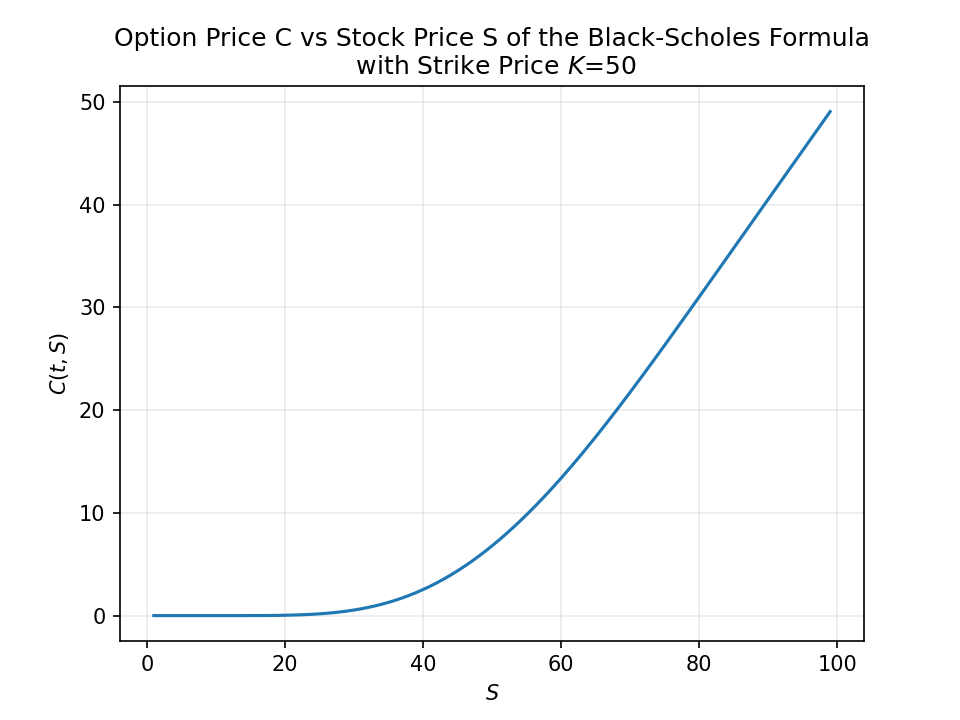

In [40]:
## Black-Scholes Formula for a Call Option ##

K = 50   ## Strike Price
r = 0.1 ## risk-free rate of interest
gamma = 0.4
T = 1 # Expiration Time in yrs 
a = 1 # Grid-Spacing
h = 0.01 # time-step
t = np.arange(0,T+h,h)
n = np.size(t)
S = np.arange(0,100+1,a)

d1 = (np.log(S/K) + (r + 0.5*(gamma**2))*(T - t))/(gamma*np.sqrt(T-t))
d2 = (np.log(S/K) + (r - 0.5*(gamma**2))*(T - t))/(gamma*np.sqrt(T-t))

def PDF(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)            ###Probability Density Function

N = 1001
def CDF(a,b):                             ###Cumulative Distribution Function using Trapezoidal rule
    h = (b-a)/(N-1)
    array = []
    for i in range(1,N-1):
        m = PDF(a+(i*h))
        array.append(m)
    g = np.sum(array)
    return h*(0.5*PDF(a)+0.5*PDF(b)+g)

C = []
for i in range(n):
    op = S[i]*CDF(-100,d1[i]) - K*np.exp(-r*(T-t[i]))*CDF(-100,d2[i])   ## Using Black-Scholes Formula
    C.append(op)
plt.plot(S, C)
plt.xlabel('$S$')
plt.ylabel('$C(t,S)$')
plt.title('Option Price C vs Stock Price S of the Black-Scholes Formula\n with Strike Price $K$=50')
plt.grid(linewidth=0.2)
plt.show()